Тема урока: регулярные выражения
Повторение совпадений
Соответствие с одним или несколькими символами
Поиск нуля и большего количества символов
Соответствие с нулем вхождений или с вхождением одного символа
Использование интервалов
Жадность и ленивость
Аннотация. Урок посвящен изучению регулярных выражений.

Повторение совпадений

Мы изучили практически все основные способы сопоставления с регулярным выражением, но во всех примерах чувствовалось одно серьезное ограничение, связанное с количеством нужных символов.

Рассмотрим формат адреса электронной почты, например:

support@stepik.org

Используя изученные метасимволы, можно создать следующее регулярное выражение:

\w@\w\.\w

Метасимвол \w соответствует всем алфавитно-цифровым символам и символу нижнего подчеркивания.

Обратите внимание на то, что символ @ не является метасимволом, поэтому ему не должен предшествовать символ обратной косой черты \.

Такое регулярное выражение верное, однако достаточно бесполезное, поскольку соответствует электронным адресам вроде a@b.c. Проблема заключается в том, что метасимвол \w соответствует одному отдельному символу, а мы не знаем заранее, сколько символов предшествует символу @.

Приведенные ниже адреса электронной почты:

timyr_guev@beegeek.org
timyr@guev.ru
tiguev@beegeek.com

являются правильными (допустимыми), но они все имеют разное количество символов перед @.

Таким образом, нам нужен специальный синтаксис в регулярных выражениях, который позволит установить соответствие с несколькими символами.

Соответствие с одним или несколькими символами

Символ + устанавливает соответствие с одним или более символами. Таким образом, если регулярное выражение a соответствует одному символу a, то регулярное выражение a+ соответствует одному или нескольким символам a. Точно так же, учитывая, что регулярное выражение [0-9] соответствует любой цифре, регулярное выражение [0-9]+ соответствует последовательности, состоящей из одной или нескольких цифр.

Регулярному выражению:

a+[0-9]+

 в тексте:

acedia1.csv
acediaaa1.csv
acediaa12345.csv
baham98.csv
sea777.json
shaaaaa123456789.json
spa.doc
naaa1.csv
na2.csv
sab1.csv
cattt1.csv

соответствует (выделено жирным шрифтом): 

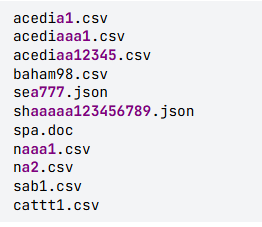

In [1]:
from functions import picture
picture('Без ичапщшмени.png')

Давайте повторно рассмотрим пример с адресами электронной почты, на сей раз используя +, чтобы установить соответствие с одним или несколькими символами.

Регулярному выражению:

\w+@\w+\.\w+

в тексте:

Присылайте личную электронную почту по адресу timyr_guev@yandex.com. Для вопросов о предстоящих курсах используйте адрес pygen@yandex.ru. Спам можете прислать по адресу spam@beegeek.com.

соответствует (выделено жирным шрифтом):

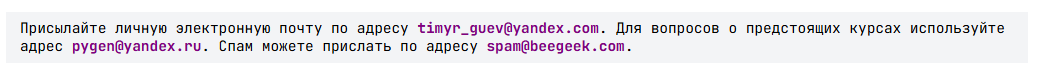

In [2]:
picture('Без имеxfdyни.png')

Символ + является метасимволом. Если требуется поиск соответствий самому символу +, то в регулярном выражении ему должен предшествовать символ обратной косой черты \+.

Метасимвол + может также использоваться для того чтобы установить соответствие с одним или несколькими наборами символов.

Регулярному выражению:

[\w.]+@[\w.]+\.\w+

в тексте:

Присылайте личную электронную почту по адресу timyr.guev@yandex.com. Для вопросов о предстоящих курсах используйте адрес pygen@beegeek.school.ru. Спам можете прислать по адресу spam@beegeek.com.

соответствует (выделено жирным шрифтом):

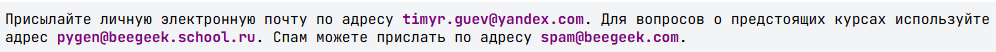

In [3]:
picture('Без именxfи.png')

In [15]:
import re
regex = r'[\w.]+@[\w.]+\.\w+'

s = "0Присылайте личную электронную почту по адресу timyr.guev@yandex.com. Для вопросов о предстоящих курсах используйте адрес pygen@beegeek.school.ru. Спам можете прислать по адресу spam@beegeek.com. q.@g59..c123"
re.findall(regex, s)

['timyr.guev@yandex.com',
 'pygen@beegeek.school.ru',
 'spam@beegeek.com',
 'q.@g59..c123']

Символ + устанавливает соответствие с одним или более символами. С отсутствующими символами (то есть с нулевым количеством символов) соответствие установлено не будет. Иногда возникает задача, в которой нужно установить соответствие с необязательными символами, то есть с такими символами, которые могут отсутствовать вообще.

Для того чтобы установить соответствие с необязательными символами в регулярных выражениях используется метасимвол *. Метасимвол * используется в точности так, как +, он записывается сразу после символа или набора и соответствует нулю или большему количеству вхождений.

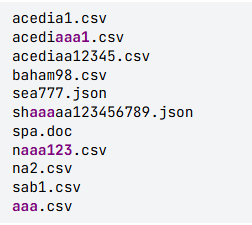

In [17]:
picture('Без имеvc15ни.png')

In [19]:
import re
regex = r'aaa[0-9]*'

s = "acedia1.csv\
acediaaa1.csv\
acediaa12345.csv\
baham98.csv\
sea777.json\
shaaaaa123456789.json\
spa.doc\
naaa123.csv\
na2.csv\
sab1.csv\
aaa.csv"
re.findall(regex, s)

['aaa1', 'aaa', 'aaa123', 'aaa']

Cимвол * является метасимволом. Если требуется поиск соответствий самому символу *, то в регулярном выражении ему должен предшествовать символ обратной косой черты \*.

Соответствие с нулем вхождений или с вхождением одного символа

Есть еще один очень полезный метасимвол ?, который позволяет установить соответствие с необязательными символами. В отличие от символа *, символ ? соответствует только отсутствию вхождений или одному вхождению.

In [25]:
import re
regex = r'https?://[\w./]+'

s = "URL http://stepik.org/ уже не безопасен. Для безопасного подключения вместо него используйте https://stepik.org/"
re.findall(regex, s)

['http://stepik.org/', 'https://stepik.org/']

Шаблон https?:// соответствует либо http://, либо https://, и ничему другому.

Символ ? является метасимволом. Если требуется поиск соответствий самому символу ?, то в регулярном выражении ему должен предшествовать символ обратной косой черты \?.

Использование интервалов

Метасимволы +, * и ? помогают решить много проблем с регулярными выражениями, но иногда этих символов недостаточно.

Учтем, что:

символы + и * соответствуют неограниченному числу символов. Они не дают возможности установить максимальное количество символов
минимальное количество вхождений, указываемое с помощью символов +, * и ?, равно нулю или единице. Эти метасимволы не позволяют установить минимальное количество совпадений явно
нет способа определить точно количество желаемых совпадений

Чтобы решить эти проблемы и обеспечить большую свободу управления повторением совпадений, в регулярных выражениях имеется возможность использования интервалов. Интервалы определяются между символами { и }.

Фигурные скобки { и } являются метасимволами. Если требуется поиск соответствий самим символам  { и }, то в регулярном выражении им должен предшествовать символ обратной косой черты  \{ и \}.

Указание точного количества совпадений

Чтобы определить точное количество совпадений, число совпадений указывают между фигурными скобками { и }. Поэтому {3} означает поиск соответствий с тремя экземплярами предыдущего символа или набора.

Рассмотрим пример с RGB-значениями. Как мы знаем, RGB-значения определяются как три набора шестнадцатеричных чисел.

Регулярное выражение:

#[0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f]
позволяет находить RGB-значения.

Проблема с таким регулярным выражением заключается в том, что приходится повторять один и тот же набор символов шесть раз.

Указанное выше регулярное выражение можно переписать в виде:

#[0-9A-Fa-f]{6}

Установление соответствия в случае интервала-диапазона

Чтобы определить диапазон количества вхождений (от минимального до максимального), также используются интервалы. Диапазоны определяются, например, так: {2,4}. Этот диапазон задает 2 в качестве минимального значения для количества вхождений и 4 – в качестве максимального значения для количества вхождений.

In [26]:
import re
regex = r'\d{1,2}[-/]\d{1,2}[-/]\d{2,4}'

s = "4/8/07\
04-08-2007\
3/3/3\
02-02-09"
re.findall(regex, s)

['4/8/0704', '73/3/302']

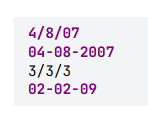

In [27]:
picture('Безxcfy имени.png')

Шаблону \d{1,2} соответствует одна или две цифры (такая проверка используется для дня и месяца). Шаблону \d{2,4} соответствует две, три или четыре цифры. Шаблону [-/] соответствует - или / в качестве разделителя даты. Указанное регулярное выражение нашло три даты, но не нашло 3/3/3, потому что для года последовательность цифр слишком короткая.

Регулярное выражение \d{1,2}[-/]\d{1,2}[-/]\d{2,4} не проверяет правильность дат, недопустимые даты 12-25-2022 и 34/57/9999 будут найдены. Такое регулярное выражение проверяет лишь правильность формата.

Установление соответствия в случае интервала типа "не менее" и "не более" 

Интервалы также можно использовать для того, чтобы определить минимальное количество совпадений, не указывая при этом максимального. Синтаксис для этого типа интервала подобен синтаксису для диапазонов, но в нем опущен максимум. Например, шаблон {3,} означает совпадение не менее чем с 3 вхождениями.

Приведем пример регулярного выражения, которое используется, чтобы определить местонахождение всех заказов, оцененных в 100 или больше долларов.

In [28]:
import re
regex = r'\d+: \$\d{3,}\.\d{2}'

s = "998: $121.80\
999: $11.65\
1000: $100.99\
1001: $1290.69\
1002: $1.46\
1003: $416.90\
1004: $25.00"
re.findall(regex, s)

['998: $121.80', '651000: $100.99', '1001: $1290.69', '461003: $416.90']

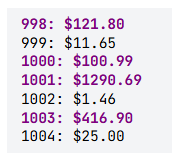

In [29]:
picture('Безxd имени.png')

Аналогично интервалам типа "не менее" мы можем работать с интервалами типа "не более". Синтаксис для этого типа интервала подобен синтаксису для диапазонов, но в нем опущен минимум. Например, шаблон {,3} означает совпадение не более чем с 3 вхождениями (ноль, одно, два или три).

Приведем пример регулярного выражения, которое используется, чтобы определить все заказы, оцененные менее чем в 100 долларов.

In [30]:
import re
regex = r'\d+: \$\d{,2}\.\d{2}'

s = "998: $121.80\
999: $11.65\
1000: $100.99\
1001: $1290.69\
1002: $1.46\
1003: $416.90\
1004: $25.00"
re.findall(regex, s)

['80999: $11.65', '691002: $1.46', '901004: $25.00']

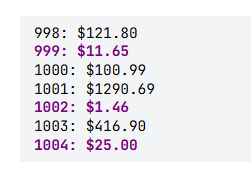

In [31]:
picture('hни.png')

Примечания

Примечание 1. Интервалы могут начинаться с нуля. Интервал {0,3} соответствует нулю, одному, двум или трем вхождениям.

Примечание 2. При использовании интервалов мы не должны указывать символ пробела в фигурных скобках.

Правильно: {0,3}.

Неправильно: {0, 3}.

Примечание 3. Метасимвол + функционально эквивалентен интервалу {1,}.

Примечание 4. Метасимвол * функционально эквивалентен интервалу {0,}.

Примечание 5. Метасимвол ? функционально эквивалентен интервалу {0,1}.

Примечание 6. Таблица соответствия шаблона с его описанием:

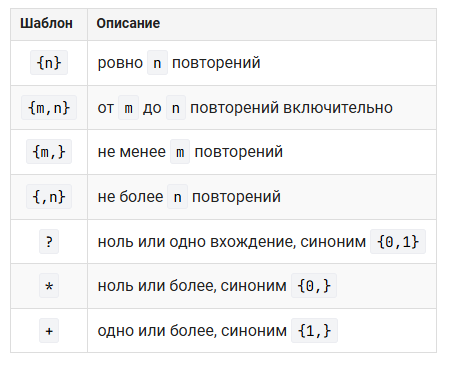

In [32]:
picture('Без иплрени.png')

Примечание 7. Когда символ + означает повторение набора, он должен быть помещен вне набора. Поэтому регулярное выражение [0-9]+ является правильным, и ему может соответствовать непустая последовательность цифр, тогда как регулярное выражение [0-9+], хотя и является синтаксически правильным, имеет совсем другое назначение. Регулярное выражение [0-9+] определяет набор от 0 до 9 и символ +, поэтому ему будут соответствовать любая единственная цифра или символ +.

Примечание 8. Мы можем использовать метасимволы +, *, ? и интервалы вместе с другими метасимволами.

In [33]:
import re
regex = r'dea.{3}n'

s = "deacons\
deadmen\
deadens\
deadest\
deadman\
deafens\
deadpan"
re.findall(regex, s)

['deadmen', 'deadman', 'deadpan']

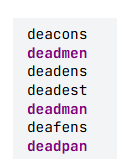

In [34]:
picture('dfgез имени.png')

Таким образом, приведенное регулярное выражение ищет последовательность символов dea за которой следуют любые три символа, за которыми, в свою очередь, следует символ n.

In [43]:
import re
regex = r'[sS].{4}k'

s = "S....k\
S.{4}k\
stepik\
Stepik\
S.4k\
s4k\
s.{4}k\
S4444k\
s.4k\
s....k"
re.findall(regex, s)

['S....k', 'S.{4}k', 'stepik', 'Stepik', 's.{4}k', 'S4444k', 's....k']

Жадность и ленивость

Рассмотрим регулярное выражение, которое находит любой текст внутри тегов <B></B>:

In [44]:
import re
regex = r'<B>.*</B>'

s = "Подписку нельзя оформить клиентам, живущим в <B>России</B>, а также <B>Беларуси</B>. Приносим свои извинения."
re.findall(regex, s)

['<B>России</B>, а также <B>Беларуси</B>']

Метасимволы * и + являются жадными, то есть они ищут наибольшее возможное соответствие, а не наименьшее. Из-за этого кажется, что соответствие начинается не с начала, а с конца текста и продолжается назад (в направлении к началу), пока не будет найдено следующее соответствие.

Если нам не нужно жадное поведение, то необходимо использовать ленивые аналоги этих метасимволов (они называются ленивыми, потому что устанавливают соответствие с наименьшим, а не с наибольшим возможным количеством символов).

Ленивые метасимволы определяются путем добавления в конец ? к используемому метасимволу, причем для каждого жадного метасимвола имеется ленивый эквивалент.

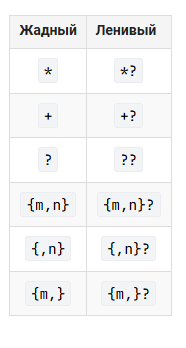

In [45]:
picture('Без ичанмени.png')

In [46]:
import re
regex = r'<B>.*?</B>'

s = "Подписку нельзя оформить клиентам, живущим в <B>России</B>, а также <B>Беларуси</B>. Приносим свои извинения."
re.findall(regex, s)

['<B>России</B>', '<B>Беларуси</B>']

Используя ленивый метасимвол *?, мы добились правильного результата.

Примечания
Примечание 1. По умолчанию метасимволы являются жадными. Они захватывают максимально возможное количество символов. Добавление ? делает их ленивыми, они начинают захватывать минимально возможное количество символов.

PAN (Permanent Account Number) – это уникальный номер, который присваивается всем налогоплательщикам в Индии. Он имеет следующий формат:

<letter><letter><letter><letter><letter><digit><digit><digit><digit><letter>
PAN всегда состоит из 10 символов, в котором letter — заглавная латинская буква, а digit — цифра.

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют PAN номера.

In [54]:
import re
regex = r'<letter><letter><letter><letter><letter><digit><digit><digit><digit><letter>'.replace('<letter>', '[A-Z]').replace('<digit>', '\d')

s = "first number is ABCD EZZPA1234ZaPMQ0000O, check thusEZZPA1234ZAPMQ0000O, "
s = "The PAN (or PAN number) is a ten-character long alpha-numeric unique identifier. Example: AAAPZ1234C"
re.findall(regex, s)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Kovalenko.Kon\AppData\Local\Temp\ipykernel_13140\3257095712.py:2: SyntaxWarning: invalid escape sequence '\d'
  regex = r'<letter><letter><letter><letter><letter><digit><digit><digit><digit><letter>'.replace('<letter>', '[A-Z]').replace('<digit>', '\d')


['AAAPZ1234C']

HTML-элементы — основа языка HTML. Каждый парный HTML-элемент обозначается начальным (открывающим) и конечным (закрывающим) тегами. Открывающий и закрывающий теги содержат имя элемента. Комментарии в страницах HTML помещаются между тегами <!-- и -->.

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют комментарии HTML.

In [60]:
import re
regex = r'<!--.*?-->'

s = "Hi, your tags <!-bee-> and <--geek--> are incorrect. Correct tags look like <!--beegeek-->"
s = "<!-- header of page --> <-- incorrect header of page !-->"
re.findall(regex, s)

['<!-- header of page -->']

Каждому гражданину страны Утопия выдается идентификационный номер, который имеет следующий формат:

номер начинается с 0—3 строчных латинских букв включительно
далее следует последовательность цифр, длина которой должна быть от 2 до 8 включительно
после цифр указываются 3 или более заглавные латинские буквы
Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют идентификационные номера граждан Утопии.

In [62]:
import re
regex = r'[a-z]{0,3}\d{2,8}[A-Z]{3,}'

s = "Dear citizen! Your old ID: tba44891AHH, your new ID: 781AHHGYT"
s = "1. name Tobot id: 234AZXR, 2. name Alph id: a6578ALPH, 3. name Teta id: abra0909CADABRA 4. name Alph up id: A6578ALPH"
re.findall(regex, s)

['234AZXR', 'a6578ALPH', 'bra0909CADABRA', '6578ALPH']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют почтовые индексы Великобритании, удовлетворяющие одновременно всем следующим условиям:

почтовый индекс начинается с одной или двух заглавных латинских букв, за которыми следует одна цифра. После цифры может следовать один необязательный символ — цифра или заглавная латинская буква
далее через пробел указываются одна цифра и любые две заглавные латинские буквы, кроме C, I, K, M, O, V

In [75]:
import re
regex = r'[A-Z]{1,2}?\d[0-9A-Z]{0,1}? \d[ABDEFGHJLNPQRSTUWXYZ]{2}'
regex = r'[A-Z]{1,2}\d[\dA-Z]? \d[ABD-HJLNP-UW-Z]{2}'

s = "Our postcodes. Arthur: NW11 8AB, Timur: P01 3AX, Anri: H7Z9T4 Dima: N16 6PS"
s = "my postcode is: 1 1PR, but it's not correct, my another postcode P0Z 9AU, it's correct, Artur's postcode CI0 0GG, it's correct, Timur's postcode CIK7O 8JH, it's not correct"
s = "Mixed postcodes: PX01 0__, a0A0A 9Aa90, FNceie00dmIJ3 3nxijnd0 DB 90, "
s = "PR0V 3RUA6. 0GHZ9a 9UY"
re.findall(regex, s)

['PR0V 3RU']